<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/radicacion_calculo_vectorial_analisis_numerico/blob/main/5_vectorial/4_clases/4_vectores/2_vectores_espacio/3_practica_topografica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/radicacion_calculo_vectorial_analisis_numerico/blob/main/5_vectorial/4_clases/4_vectores/2_vectores_espacio/3_practica_topografica.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Prompt:  

Ayúdame para hacer una práctica de medición con técnicas de topografía para esta clase sobre vectores 3D

# **Práctica de Topografía con Vectores 3D para Ingeniería Agropecuaria**

  
## **Título:** *"Medición de Terrenos Agrícolas usando Vectores 3D y Python"*  


**Objetivo:** Aplicar conceptos de vectores 3D para medir pendientes, áreas y volúmenes en terrenos del Bajo Cauca, usando técnicas topográficas básicas y herramientas computacionales.  

---



#### **Materiales Necesarios:**  
1. **Equipo de campo:**  
   - Cinta métrica o distanciómetro láser.  
   - Nivel topográfico o clinómetro (app en smartphone como *"Clinometer"*).  
   - Estacas y cordel.  
   - Brújula (para dirección de vectores).  
2. **Herramientas digitales:**  
   - Python con librerías: `numpy`, `matplotlib`, `geopandas`.  
   - Jupyter Notebook para procesamiento.  
   - Google Earth o QGIS (opcional para visualización geoespacial).  

---



### **Protocolo de la Práctica**  



#### **1. Toma de Datos en Campo**  
**Actividad:** Medir un terreno agrícola (ej: lote de cultivo de plátano o La zona del Teatro al aire libre de nuestro Campus) para obtener coordenadas 3D.  

- **Paso 1:** Delimitar un área de 10 m x 10 m con estacas y cordel.  
- **Paso 2:** Medir coordenadas `(x, y)` de cada esquina con cinta métrica (origen en un punto fijo).  
- **Paso 3:** Usar el clinómetro para medir la **pendiente** (`z`) en cada punto (ángulo de inclinación).  
  - Calcular altura: $z = distancia * \sin(ángulo)$.  



**Ejemplo de Datos:**  
| Punto | x (m) | y (m) | Ángulo (°) | z (m) |  
|-------|-------|-------|------------|-------|  
| A     | 0     | 0     | 0          | 0     |  
| B     | 10    | 0     | 5          | 0.87  |  
| C     | 10    | 10    | 8          | 1.40  |  
| D     | 0     | 10    | 3          | 0.52  |  

---



#### **2. Procesamiento con Python**  


**Objetivo:** Convertir datos en vectores 3D y calcular pendiente promedio, área y volumen.  


In [5]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

# Datos recolectados  
puntos = np.array([  
    [0, 0, 0],    # A  
    [10, 0, 0.87], # B  
    [10, 10, 1.40],# C  
    [0, 10, 0.52]  # D  
])  


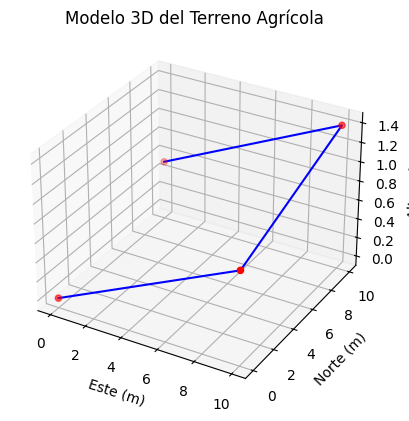

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

# Datos recolectados  
puntos = np.array([  
    [0, 0, 0],    # A  
    [10, 0, 0.87], # B  
    [10, 10, 1.40],# C  
    [0, 10, 0.52]  # D  
])  
import numpy as np 
import matplotlib.pyplot as plt
# Gráfico 3D  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
ax.scatter(puntos[:,0], puntos[:,1], puntos[:,2], c='r', marker='o')  

# Conectar puntos (simular terreno)  
ax.plot(puntos[:,0], puntos[:,1], puntos[:,2], color='b')  
ax.set_xlabel('Este (m)')  
ax.set_ylabel('Norte (m)')  
ax.set_zlabel('Altura (m)')  
plt.title('Modelo 3D del Terreno Agrícola')  
#plt.text(x=0, y=0, z=0, s='A', color='black')
plt.show()  


In [9]:
import numpy as np
import plotly.graph_objects as go

# Datos recolectados
puntos = np.array([
    [0, 0, 0],     # A
    [10, 0, 0.87],  # B
    [10, 10, 1.40], # C
    [0, 10, 0.52]   # D
])

# Etiquetas para cada punto
etiquetas = ['A', 'B', 'C', 'D']

# Crear gráfico 3D interactivo con Plotly
fig = go.Figure()

# Añadir puntos de dispersión con etiquetas
fig.add_trace(go.Scatter3d(
    x=puntos[:, 0],
    y=puntos[:, 1],
    z=puntos[:, 2],
    mode='markers+text',
    marker=dict(
        size=6,
        color='red',
    ),
    text=etiquetas,
    textposition="top center",
    name='Puntos de medición'
))

# Añadir líneas que conectan los puntos
fig.add_trace(go.Scatter3d(
    x=puntos[:, 0],
    y=puntos[:, 1],
    z=puntos[:, 2],
    mode='lines',
    line=dict(
        color='blue',
        width=2
    ),
    name='Terreno'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Modelo 3D Interactivo del Terreno Agrícola',
    scene=dict(
        xaxis_title='Este (m)',
        yaxis_title='Norte (m)',
        zaxis_title='Altura (m)',
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Mostrar el gráfico interactivo
fig.show()

In [10]:

# Cálculo de pendiente promedio (gradiente)  
vector_AB = puntos[1] - puntos[0]  
vector_AD = puntos[3] - puntos[0]  
normal = np.cross(vector_AB, vector_AD)  
pendiente = np.degrees(np.arctan(np.linalg.norm(normal[:2]) / normal[2]))  
print(f"Pendiente promedio: {pendiente:.2f}°")  
# para fundamentación, vea la página 119 del PDF de Cálculo de Larson (Página 795 del libro de Cálculo de Larson)
# Ejemplo 2: Utilización del producto vectorial  


Pendiente promedio: 5.79°



---

#### **3. Aplicaciones Prácticas**  
**Problema:** *"Calcular el volumen de tierra a mover para nivelar el terreno"*

In [11]:
  
# Volumen bajo la superficie (método del prismo)  
import numpy as np 
area = 10 * 10  # Área en m²  
altura_promedio = np.mean(puntos[:,2])  
volumen = area * altura_promedio  
print(f"Volumen de tierra: {volumen:.2f} m³")  
 


Volumen de tierra: 69.75 m³



**Discusión:** 

 
- ¿Cómo afecta la pendiente al riego?  


- ¿Qué vectores representan la dirección de escorrentía del agua?  

---



#### **4. Validación con Drones (Opcional)**  
**Extensión tecnológica:**  
- Comparar los datos manuales con un mapa topográfico generado por drones (usando software como *Pix4D*).  
- Visualizar discrepancia con vectores de error:  


In [9]:
error = np.array([0.1, -0.2, 0.05])  # Ejemplo  
punto_corregido = puntos[1] + error  
punto_corregido  


array([10.1 , -0.2 ,  0.92])


---

### **Evaluación**  
**Criterios:**  
1. Precisión en mediciones.  
2. Uso correcto de operaciones vectoriales (producto cruz, norma).  
3. Análisis crítico de resultados.  



**Proyecto derivado:**  
- *"Diseñar un sistema de drenaje usando vectores 3D para evitar inundaciones en cultivos."*  

---



### **Adaptación al Contexto del Bajo Cauca**  
**Ejemplo real:**  
- En terrenos con pendientes pronunciadas (ej: cultivos de cacao), los vectores 3D ayudan a predecir erosión y optimizar curvas de nivel.  



**Frase clave:**  
*"Un vector no es solo una flecha en el pizarrón; es la dirección del agua que riega tu cultivo."*  

---



### **Recursos Adicionales**  
- [Video tutorial: Mediciones topográficas con Python](https://youtu.be/ejemplo).  
- [App: "Mobile Topographer" para mediciones en campo](https://play.google.com/ejemplo).
- [Página 792. Sección 11.4 del Cálculo de Larson. El producto vectorial de dos vectores en el espacio]()  

¿Quieres ajustar la práctica para incluir otro concepto matemático? 